Done. You have the matrices PP QQ  RR  SS  WW.
  
Done.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
These are the UNFILTERED SIMULATION results.
  
  
You have the matrices "Response" and "Response_named"
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
These are expressd as %-deviations from steady state.
  
If you want, you can download these into an excel file
or use them to make plots.
  
 
 
You have the matrices "SS_level_Response" and "SS_level_Response_named" 
  
These variables are levels, which are calculated from given steady
values and simulated values for %-deviations from steady state.
  
 
 
You have the matrices "SS_ln_Response" and "SS_ln_Response_named" 
 
These are the equivalent natural log levels.
 
NOTE:  Some levels for certain variable are negative
due to their variability, i.e. large %-deviations from steady state
and the log of negative numbers is undefined.


Uhlig_simul_rand.ipynb:257: RuntimeWarning: invalid value encountered in log
  "#print('SS_level_Response_named[:,0:6] = ')\n",
Detrend_Filters.ipynb:122: RuntimeWarning: invalid value encountered in log
  "Input_mat_named = Input_level_mat_named\n",
Detrend_Filters.ipynb:123: RuntimeWarning: invalid value encountered in log
  "\n",


  
  
Trend and cycle components have been computed.
  
The matrices Mat_ln_trend, Mat_ln_trend_named,
Mat_ln_cycle, Mat_ln_cycle_named,
Mat_1st_diff_level, Mat_1st_diff_level_named,
can be downloaded to excel or used to make plots.
  
  
Detrending Filter Used:  Hodrick-Prescott
Applied on: Natural log of simulated levels
  
Also computed for comparison purposes: Log first differences of simulated levels
  
Total Series (BLUE) = Trend Component (GREEN) + Cyclical Comoponent (BLACK)
  
y-axis:  natural log scale
  
BLUE:  Natural Log of Simulated Levels, ln(y(t))
  
GREEN:  Trend component of natural log of levels
  
BLACK:  Cyclical component of natural log of levels
  
x-axis: time periods
  
RED / y-axis: Log first difference of simulated levels,  i.e.  ln(y(t)) less ln(y(t-1))
  


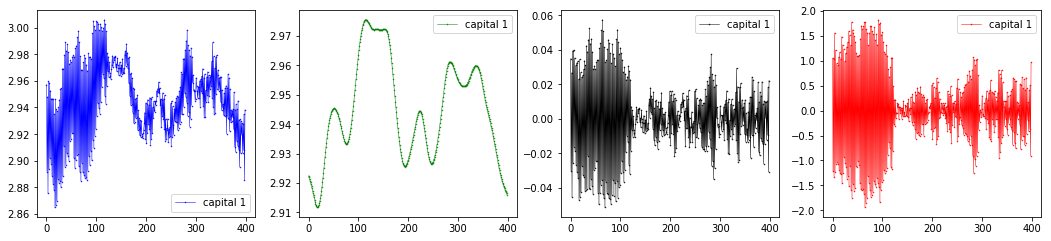

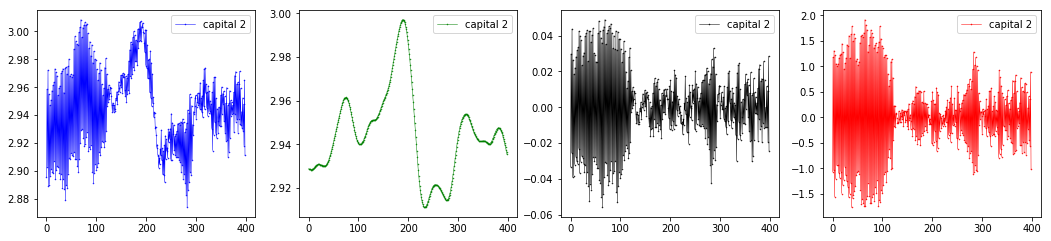

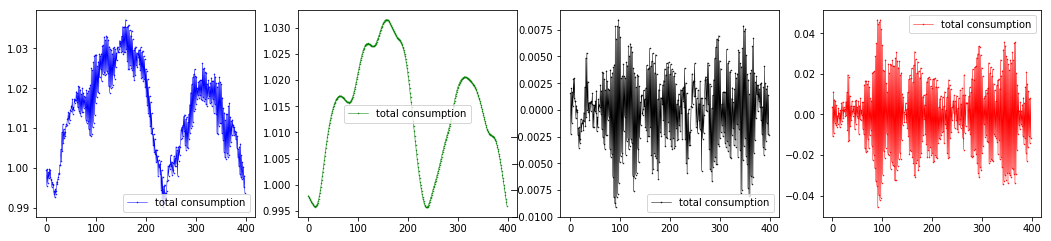

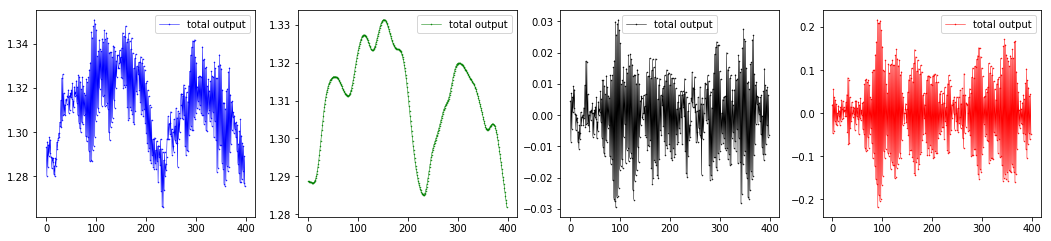

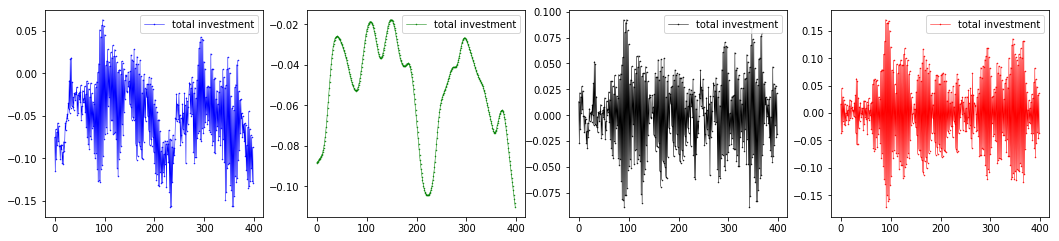

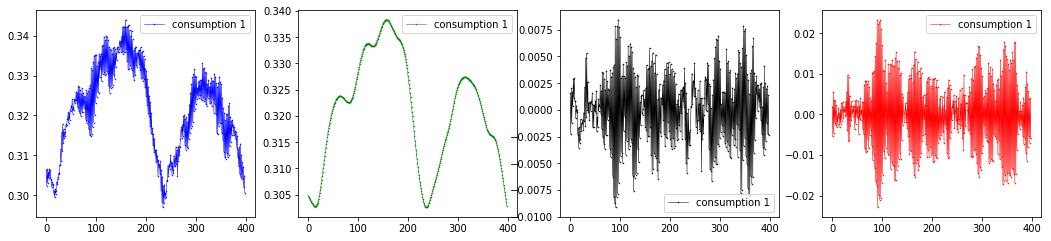

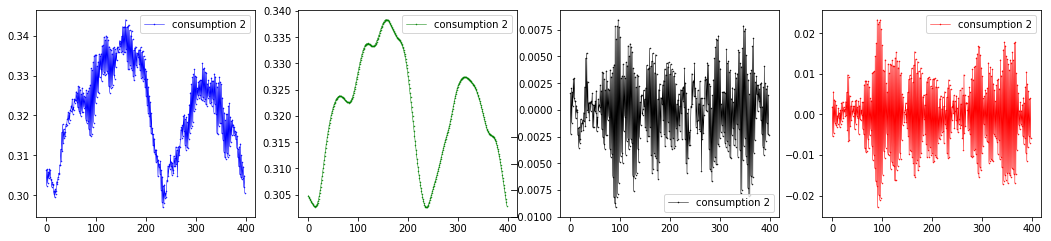

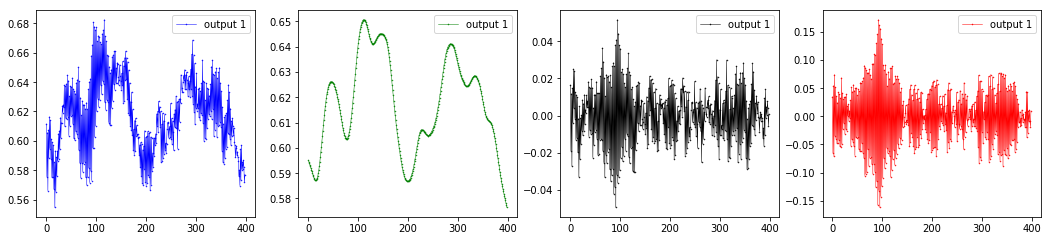

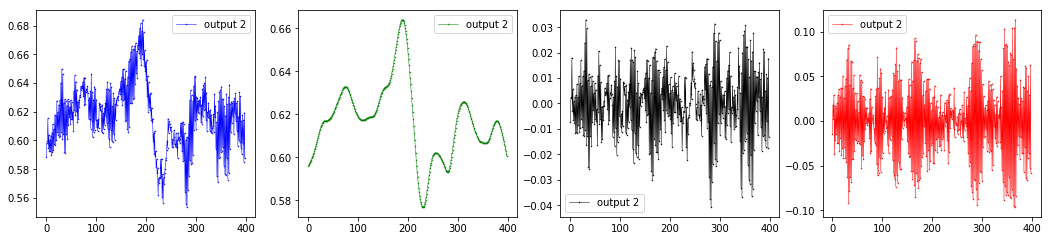

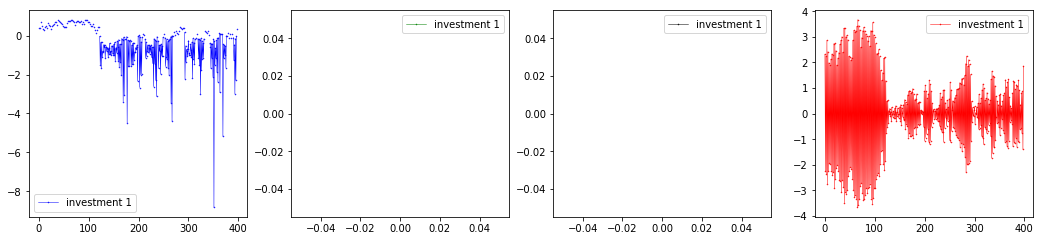

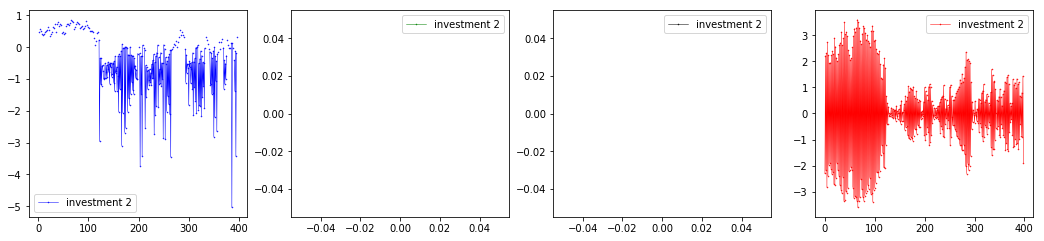

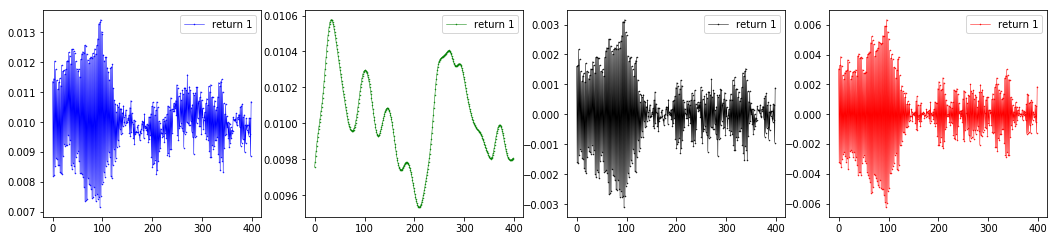

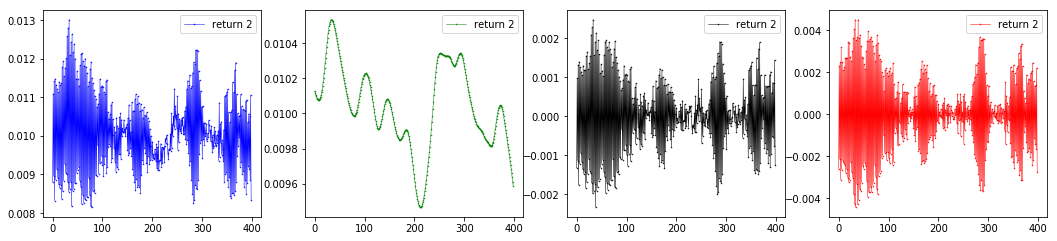

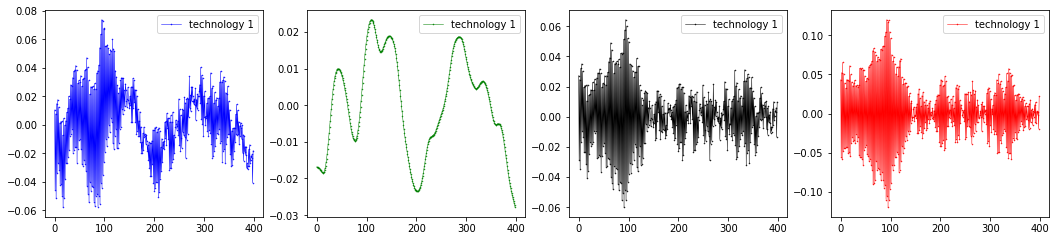

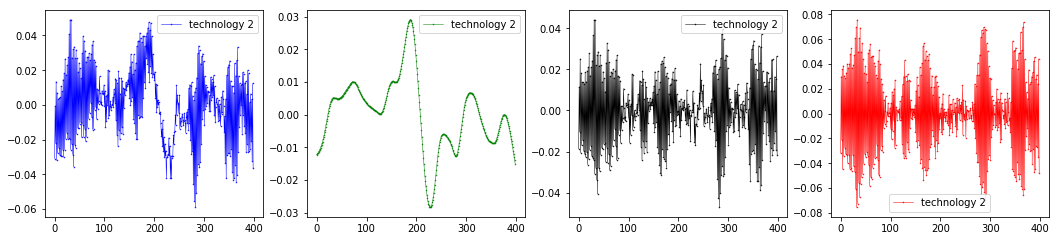

  
  
Shocks used in simulation
  


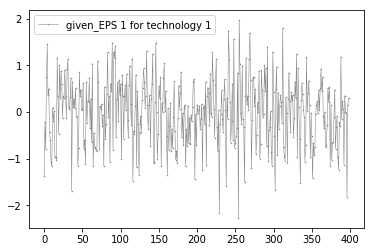

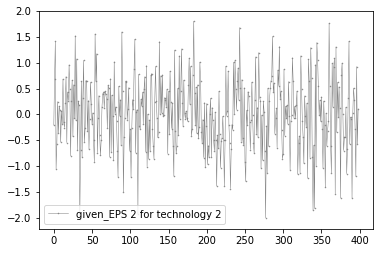

   
   
 
START:   Moments for Cyclical Ln Levels
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Cyclical Ln Levels
 


,Mean,Std Deviation,Coeff of Variation
capital 1,5.562020e-05,2.286411e-02,4.110756e+02
capital 2,-5.901654e-05,2.261282e-02,-3.831607e+02
total consumption,-5.334870e-08,3.591280e-03,-6.731711e+04
total output,2.552258e-06,1.233943e-02,4.834713e+03
total investment,1.025146e-05,3.786873e-02,3.693985e+03
consumption 1,-5.334870e-08,3.591280e-03,-6.731711e+04
consumption 2,-5.334870e-08,3.591280e-03,-6.731711e+04
output 1,8.113872e-06,1.621493e-02,1.998420e+03
output 2,-3.237352e-06,1.355727e-02,-4.187765e+03
investment 1,nan,nan,nan


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Cyclical Ln Levels
 


,Correlation with GDP,Std Dev Relative to GDP
capital 1,2.497377e-01,1.852930e+00
capital 2,-2.041318e-01,1.832565e+00
total consumption,9.901169e-01,2.910409e-01
total output,1.000000e+00,1.000000e+00
total investment,9.991408e-01,3.068920e+00
consumption 1,9.901169e-01,2.910409e-01
consumption 2,9.901169e-01,2.910409e-01
output 1,8.603120e-01,1.314074e+00
output 2,7.925491e-01,1.098695e+00
investment 1,nan,nan


 
 
  
Table 03:  Autocorrelations  for Cyclical Ln Levels
                  corr{ y(t=0), y(t +/- i) } 
 


,capital 1,capital 2,total consumption,total output,total investment,consumption 1,consumption 2,output 1,output 2,investment 1,investment 2,return 1,return 2,technology 1,technology 2
6,8.555605e-01,8.524071e-01,7.666059e-01,7.881648e-01,7.898811e-01,7.666059e-01,7.666059e-01,7.448768e-01,6.692089e-01,nan,nan,8.959717e-01,8.631969e-01,8.518879e-01,7.914594e-01
5,-8.770530e-01,-8.747060e-01,-7.711850e-01,-8.162653e-01,-8.203509e-01,-7.711850e-01,-7.711850e-01,-7.824100e-01,-7.340956e-01,nan,nan,-9.115741e-01,-8.812568e-01,-8.730745e-01,-8.250049e-01
4,8.910047e-01,8.892307e-01,8.430487e-01,8.539667e-01,8.544928e-01,8.430487e-01,8.430487e-01,8.154965e-01,7.399378e-01,nan,nan,9.294008e-01,9.014759e-01,8.972573e-01,8.420803e-01
3,-8.980786e-01,-8.953769e-01,-7.740635e-01,-8.320363e-01,-8.368888e-01,-7.740635e-01,-7.740635e-01,-7.791248e-01,-7.165968e-01,nan,nan,-9.400279e-01,-9.140275e-01,-8.928973e-01,-8.441013e-01
2,9.392033e-01,9.387582e-01,9.180544e-01,9.203007e-01,9.204349e-01,9.180544e-01,9.180544e-01,8.912997e-01,8.569430e-01,nan,nan,9.625419e-01,9.466440e-01,9.424160e-01,9.142556e-01
1,-9.120790e-01,-9.103432e-01,-7.652022e-01,-8.320828e-01,-8.376590e-01,-7.652022e-01,-7.652022e-01,-7.455401e-01,-6.660418e-01,nan,nan,-9.642483e-01,-9.511428e-01,-8.998657e-01,-8.567174e-01
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,nan,nan,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,-9.120790e-01,-9.103432e-01,-7.652022e-01,-8.320828e-01,-8.376590e-01,-7.652022e-01,-7.652022e-01,-7.455401e-01,-6.660418e-01,nan,nan,-9.642483e-01,-9.511428e-01,-8.998657e-01,-8.567174e-01
-2,9.392033e-01,9.387582e-01,9.180544e-01,9.203007e-01,9.204349e-01,9.180544e-01,9.180544e-01,8.912997e-01,8.569430e-01,nan,nan,9.625419e-01,9.466440e-01,9.424160e-01,9.142556e-01
-3,-8.980786e-01,-8.953769e-01,-7.740635e-01,-8.320363e-01,-8.368888e-01,-7.740635e-01,-7.740635e-01,-7.791248e-01,-7.165968e-01,nan,nan,-9.400279e-01,-9.140275e-01,-8.928973e-01,-8.441013e-01


 
 
  
Table 04:  Cross Correlations with Output  for Cyclical Ln Levels
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital 1,capital 2,total consumption,total output,total investment,consumption 1,consumption 2,output 1,output 2,investment 1,investment 2,return 1,return 2,technology 1,technology 2
6,2.107719e-01,-1.659696e-01,7.993625e-01,7.881648e-01,7.821129e-01,7.993625e-01,7.993625e-01,6.728096e-01,6.293717e-01,nan,nan,4.602869e-01,1.403888e-01,5.811273e-01,3.995921e-01
5,-2.084902e-01,1.943115e-01,-7.713121e-01,-8.162653e-01,-8.255087e-01,-7.713121e-01,-7.713121e-01,-7.034433e-01,-6.450446e-01,nan,nan,-4.908131e-01,-1.559700e-01,-6.132137e-01,-4.165246e-01
4,2.354036e-01,-1.858298e-01,8.666843e-01,8.539667e-01,8.470694e-01,8.666843e-01,8.666843e-01,7.385305e-01,6.710710e-01,nan,nan,4.985552e-01,1.517163e-01,6.341917e-01,4.272312e-01
3,-2.198703e-01,2.043649e-01,-7.875762e-01,-8.320363e-01,-8.408461e-01,-7.875762e-01,-7.875762e-01,-7.197398e-01,-6.541970e-01,nan,nan,-5.061639e-01,-1.514969e-01,-6.298107e-01,-4.184831e-01
2,2.465903e-01,-1.955734e-01,9.274893e-01,9.203007e-01,9.149119e-01,9.274893e-01,9.274893e-01,7.963617e-01,7.237151e-01,nan,nan,5.312023e-01,1.733662e-01,6.804785e-01,4.664888e-01
1,-2.292704e-01,2.078818e-01,-7.967614e-01,-8.320828e-01,-8.383644e-01,-7.967614e-01,-7.967614e-01,-7.232952e-01,-6.501501e-01,nan,nan,-5.096649e-01,-1.430065e-01,-6.336323e-01,-4.115083e-01
0,2.497377e-01,-2.041318e-01,9.901169e-01,1.000000e+00,9.991408e-01,9.901169e-01,9.901169e-01,8.603120e-01,7.925491e-01,nan,nan,5.685433e-01,2.069077e-01,7.323228e-01,5.208933e-01
-1,-2.404977e-01,2.058642e-01,-8.187928e-01,-8.320828e-01,-8.326048e-01,-8.187928e-01,-8.187928e-01,-7.266378e-01,-6.463072e-01,nan,nan,-5.081995e-01,-1.338516e-01,-6.344580e-01,-4.042353e-01
-2,2.447426e-01,-2.127251e-01,8.938821e-01,9.203007e-01,9.243750e-01,8.938821e-01,8.938821e-01,7.972106e-01,7.230774e-01,nan,nan,5.473305e-01,1.703430e-01,6.903288e-01,4.643277e-01
-3,-2.526510e-01,2.096907e-01,-8.321382e-01,-8.320363e-01,-8.289699e-01,-8.321382e-01,-8.321382e-01,-7.292862e-01,-6.435430e-01,nan,nan,-5.134280e-01,-1.209624e-01,-6.386919e-01,-3.952353e-01


 
 
END:   Moments for Cyclical Ln Levels
 
 
START:   Moments for Ln First Differences
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Ln First Differences
 


,Mean,Std Deviation,Coeff of Variation
capital 1,1.735234e-03,8.475939e-01,4.884610e+02
capital 2,-1.950452e-03,8.391350e-01,-4.302260e+02
total consumption,-3.024963e-05,1.870910e-02,-6.184904e+02
total output,-1.108513e-04,8.795407e-02,-7.934420e+02
total investment,-8.060166e-05,6.926966e-02,-8.594074e+02
consumption 1,-1.512481e-05,9.354552e-03,-6.184904e+02
consumption 2,-1.512481e-05,9.354552e-03,-6.184904e+02
output 1,-6.963356e-05,5.647554e-02,-8.110390e+02
output 2,-4.121772e-05,4.584669e-02,-1.112305e+03
investment 1,5.559574e-03,1.668794e+00,3.001658e+02


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Ln First Differences
 


,Correlation with GDP,Std Dev Relative to GDP
capital 1,2.633911e-01,9.636779e+00
capital 2,-2.236646e-01,9.540605e+00
total consumption,9.989605e-01,2.127145e-01
total output,1.000000e+00,1.000000e+00
total investment,9.999242e-01,7.875663e-01
consumption 1,9.989605e-01,1.063572e-01
consumption 2,9.989605e-01,1.063572e-01
output 1,8.881654e-01,6.421026e-01
output 2,8.243659e-01,5.212572e-01
investment 1,2.656123e-01,1.897347e+01


 
 
  
Table 03:  Autocorrelations  for Ln First Differences
                  corr{ y(t=0), y(t +/- i) } 
 


,capital 1,capital 2,total consumption,total output,total investment,consumption 1,consumption 2,output 1,output 2,investment 1,investment 2,return 1,return 2,technology 1,technology 2
6,9.007302e-01,8.991918e-01,8.690260e-01,8.698105e-01,8.698714e-01,8.690260e-01,8.690260e-01,8.730210e-01,8.369607e-01,9.095794e-01,9.081609e-01,9.141432e-01,8.868710e-01,9.034364e-01,8.633400e-01
5,-9.141366e-01,-9.122359e-01,-8.863957e-01,-8.928937e-01,-8.935061e-01,-8.863957e-01,-8.863957e-01,-8.935053e-01,-8.593969e-01,-9.229631e-01,-9.216345e-01,-9.282384e-01,-9.031591e-01,-9.196417e-01,-8.827500e-01
4,9.303078e-01,9.289641e-01,9.158381e-01,9.164682e-01,9.165322e-01,9.158381e-01,9.158381e-01,9.154867e-01,8.795016e-01,9.388047e-01,9.375872e-01,9.442796e-01,9.214616e-01,9.378383e-01,9.028309e-01
3,-9.468678e-01,-9.452312e-01,-9.298280e-01,-9.369316e-01,-9.376006e-01,-9.298280e-01,-9.298280e-01,-9.330232e-01,-9.040627e-01,-9.546419e-01,-9.536210e-01,-9.594277e-01,-9.404781e-01,-9.537181e-01,-9.252551e-01
2,9.631435e-01,9.623810e-01,9.563312e-01,9.566668e-01,9.567009e-01,9.563312e-01,9.563312e-01,9.478060e-01,9.282566e-01,9.710449e-01,9.703643e-01,9.738473e-01,9.610150e-01,9.677153e-01,9.484829e-01
1,-9.815863e-01,-9.808467e-01,-9.685903e-01,-9.763611e-01,-9.770942e-01,-9.685903e-01,-9.685903e-01,-9.658603e-01,-9.510508e-01,-9.886870e-01,-9.884116e-01,-9.890643e-01,-9.836351e-01,-9.835803e-01,-9.735327e-01
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,-9.815863e-01,-9.808467e-01,-9.685903e-01,-9.763611e-01,-9.770942e-01,-9.685903e-01,-9.685903e-01,-9.658603e-01,-9.510508e-01,-9.886870e-01,-9.884116e-01,-9.890643e-01,-9.836351e-01,-9.835803e-01,-9.735327e-01
-2,9.631435e-01,9.623810e-01,9.563312e-01,9.566668e-01,9.567009e-01,9.563312e-01,9.563312e-01,9.478060e-01,9.282566e-01,9.710449e-01,9.703643e-01,9.738473e-01,9.610150e-01,9.677153e-01,9.484829e-01
-3,-9.468678e-01,-9.452312e-01,-9.298280e-01,-9.369316e-01,-9.376006e-01,-9.298280e-01,-9.298280e-01,-9.330232e-01,-9.040627e-01,-9.546419e-01,-9.536210e-01,-9.594277e-01,-9.404781e-01,-9.537181e-01,-9.252551e-01


 
 
  
Table 04:  Cross Correlations with Output  for Ln First Differences
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital 1,capital 2,total consumption,total output,total investment,consumption 1,consumption 2,output 1,output 2,investment 1,investment 2,return 1,return 2,technology 1,technology 2
6,2.261498e-01,-1.917022e-01,8.686655e-01,8.698105e-01,8.698096e-01,8.686655e-01,8.686655e-01,7.668020e-01,7.241048e-01,2.322876e-01,-1.982084e-01,4.957737e-01,1.559617e-01,6.365643e-01,4.383505e-01
5,-2.351897e-01,2.014785e-01,-8.888637e-01,-8.928937e-01,-8.936638e-01,-8.888637e-01,-8.888637e-01,-7.896537e-01,-7.402391e-01,-2.416252e-01,2.066421e-01,-5.121884e-01,-1.575362e-01,-6.564815e-01,-4.469481e-01
4,2.452284e-01,-2.089630e-01,9.153323e-01,9.164682e-01,9.164482e-01,9.153323e-01,9.153323e-01,8.135457e-01,7.560344e-01,2.494112e-01,-2.135529e-01,5.263579e-01,1.595224e-01,6.755779e-01,4.556388e-01
3,-2.508256e-01,2.154198e-01,-9.328308e-01,-9.369316e-01,-9.377051e-01,-9.328308e-01,-9.328308e-01,-8.327850e-01,-7.715925e-01,-2.553461e-01,2.186577e-01,-5.389889e-01,-1.634054e-01,-6.916603e-01,-4.653846e-01
2,2.563998e-01,-2.183899e-01,9.557595e-01,9.566668e-01,9.565708e-01,9.557595e-01,9.557595e-01,8.507984e-01,7.872638e-01,2.593582e-01,-2.219200e-01,5.485604e-01,1.674479e-01,7.054162e-01,4.752821e-01
1,-2.593352e-01,2.225165e-01,-9.719157e-01,-9.763611e-01,-9.772136e-01,-9.719157e-01,-9.719157e-01,-8.681305e-01,-8.036958e-01,-2.629462e-01,2.246793e-01,-5.590335e-01,-1.735174e-01,-7.193813e-01,-4.867866e-01
0,2.633911e-01,-2.236646e-01,9.989605e-01,1.000000e+00,9.999242e-01,9.989605e-01,9.989605e-01,8.881654e-01,8.243659e-01,2.656123e-01,-2.264205e-01,5.687488e-01,1.806476e-01,7.341438e-01,5.009477e-01
-1,-2.653495e-01,2.268490e-01,-9.749860e-01,-9.763611e-01,-9.763843e-01,-9.749860e-01,-9.749860e-01,-8.701774e-01,-8.011743e-01,-2.683956e-01,2.302198e-01,-5.630946e-01,-1.672279e-01,-7.226612e-01,-4.817238e-01
-2,2.677938e-01,-2.300946e-01,9.554144e-01,9.566668e-01,9.566640e-01,9.554144e-01,9.554144e-01,8.548907e-01,7.822227e-01,2.719984e-01,-2.346868e-01,5.593960e-01,1.546494e-01,7.135417e-01,4.650224e-01
-3,-2.721691e-01,2.353940e-01,-9.356228e-01,-9.369316e-01,-9.369511e-01,-9.356228e-01,-9.356228e-01,-8.429146e-01,-7.591146e-01,-2.753029e-01,2.388522e-01,-5.554887e-01,-1.423689e-01,-7.058143e-01,-4.465389e-01


 
 
END:   Moments for Ln First Differences
 


In [3]:
#  Uhlig's Exampl7.m
#  Two Country Stochastic Neoclassical Growth Model


import numpy as np


Z_bar_1   = 1
Z_bar_2   = 1
rho_1     = 0.36
rho_2     = 0.36
delta_1   = 0.025
delta_2   = 0.025
N_bar_1   = 1/2
N_bar_2   = 1/2
C_1_frac  = 0.5
betta     = 0.99
eta_1     = 1.0
eta_2     = 1.0

psi_1     = 0.95
psi_2     = 0.95

sigma_sigma = 0.712
corr_12   = 0


R_bar_1   = 1.0/betta
R_bar_2   = 1.0/betta

YK_bar_1  = (R_bar_1 - 1 + delta_1)/rho_1
YK_bar_2  = (R_bar_2 - 1 + delta_2)/rho_2

K_bar_1 = N_bar_1 * ( Z_bar_1 / YK_bar_1 )**(1.0/(1-rho_1))
K_bar_2 = N_bar_2 * ( Z_bar_2 / YK_bar_2 )**(1.0/(1-rho_2))

Y_bar_1 = YK_bar_1 * K_bar_1
Y_bar_2 = YK_bar_2 * K_bar_2

X_bar_1 = delta_1 * K_bar_1
X_bar_2 = delta_2 * K_bar_2

Y_bar = Y_bar_1 + Y_bar_2
X_bar = X_bar_1 + X_bar_2

C_bar   = Y_bar - X_bar
C_bar_1 = C_1_frac * C_bar
C_bar_2 = (1-C_1_frac)*C_bar


VARNAMES = ['capital 1',
                         'capital 2',
                         'total consumption',
                         'total output',
                         'total investment',
                         'consumption 1',
                         'consumption 2',
                         'output 1',
                         'output 2',
                         'investment 1',
                         'investment 2',
                         'return 1',
                         'return 2',
                         'technology 1',
                         'technology 2']

SteadyState = [[K_bar_1],
                         [K_bar_2],
                         [C_bar],
                         [Y_bar],
                         [X_bar],
                         [C_bar_1],
                         [C_bar_2],
                         [Y_bar_1],
                         [Y_bar_2],
                         [X_bar_1],
                         [X_bar_2],
                         [R_bar_1],
                         [R_bar_2],
                         [1],
                         [1]]

AA = np.vstack(([0, 0],  
                          [0, 0],
                          [0, 0],
                          [0, 0],
                          [0, 0], 
                          [0, 0],
                          [0, 0],
                          [-1, 0],
                          [0, -1],
                          [0, 0],
                          [0, 0]))


BB = np.vstack(([0, 0], 
                           [0, 0], 
                           [0, 0],  
                           [0, 0],  
                           [0, 0], 
                           [rho_1, 0], 
                           [0, rho_2],
                           [(1-delta_1),0],
                           [0,(1-delta_2)],
                           [-rho_1*YK_bar_1,0],
                           [0,-rho_2*YK_bar_2 ]))       

CC = np.vstack(([C_bar,-Y_bar, X_bar, 0,  0,    0,  0,    0,  0,  0,  0],
                           [0, 0,-X_bar, 0,  0, 0, 0, X_bar_1,X_bar_2, 0,0],
                           [0,-Y_bar, 0, 0, 0, Y_bar_1,Y_bar_2, 0, 0, 0, 0],
                           [-C_bar,0,0, C_bar_1,C_bar_2,0, 0, 0, 0, 0, 0],
                           [0, 0, 0,  eta_1,-eta_2, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0,  -1, 0, 0, 0, 0, 0],
                           [0,0,0, 0, 0, 0, -1, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0,delta_1,0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, delta_2, 0, 0],
                           [0, 0, 0, 0, 0, rho_1*YK_bar_1,0, 0, 0, -R_bar_1,0],
                           [0, 0, 0, 0, 0, 0, rho_2*YK_bar_2, 0, 0, 0,-R_bar_2 ]))

DD = np.vstack(([0,0],
                           [0,0],
                           [0,0],
                           [0,0],
                           [0,0],
                           [1,0],
                           [0,1],
                           [0,0],
                           [0,0],
                           [0,0],
                           [0,0]))

FF = np.vstack(([0, 0],
                          [0, 0]))

GG = np.vstack(([0, 0],
                            [0, 0]))

HH = np.vstack(([0, 0],
                           [0, 0]))

JJ = np.vstack(([0, 0, 0, -eta_1, 0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, -eta_2, 0, 0, 0, 0, 0, 1]))

KK = np.vstack(([0, 0, 0, eta_1, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, eta_2, 0, 0, 0, 0, 0, 0]))

LL = np.vstack(([0, 0],
                          [0, 0]))

MM = np.vstack(([0, 0],
                            [0, 0]))


NN = np.vstack(([psi_1, 0],
                           [0, psi_2]))

Sigma = [sigma_sigma**2]*np.vstack(([1, corr_12],[corr_12, 1]))

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 3


#  To calculate moments for cyclical ln levels

print(' ')
print('START:   Moments for Cyclical Ln Levels')

Input_momat =  Mat_ln_cycle
Input_momat_named = Mat_ln_cycle_named
label_mom = 'for Cyclical Ln Levels'

%run Calc_Moments.ipynb

print('END:   Moments for Cyclical Ln Levels')
print(' ')

#  To calculate moments for ln first differences

print(' ')
print('START:   Moments for Ln First Differences')

Input_momat =  Mat_ln_1st_diff 
Input_momat_named = Mat_ln_1st_diff_named
label_mom = 'for Ln First Differences'

%run Calc_Moments.ipynb

print('END:   Moments for Ln First Differences')
print(' ')


